In [1]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np
import os
import shutil
import sys
sys.path.insert(0,'/home/ernie/caffe2/build')
from caffe2.python import core, model_helper, net_drawer, workspace, visualize, brew
from caffe2.proto import caffe2_pb2
# If you would like to see some really detailed initializations,
# you can change --caffe2_log_level=0 to --caffe2_log_level=-1
core.GlobalInit(['caffe2', '--caffe2_log_level=0'])
print("Necessities imported!")

Necessities imported!


In [2]:
init_net = core.Net("ssd_init")
train_net = core.Net("ssd_train")

conv1_1_w = init_net.XavierFill([],'conv1_1_w',shape=[64,3,3,3])
conv1_1_b = init_net.ConstantFill([],'conv1_1_b',shape=[64],value=0.)

conv1_2_w = init_net.XavierFill([],'conv1_2_w',shape=[64,64,3,3])
conv1_2_b = init_net.ConstantFill([],'conv1_2_b',shape=[64],value=0.)

conv2_1_w = init_net.XavierFill([],'conv2_1_w',shape=[128,64,3,3])
conv2_1_b = init_net.ConstantFill([],'conv2_1_b',shape=[128],value=0.)
conv2_2_w = init_net.XavierFill([],'conv2_2_w',shape=[128,128,3,3])
conv2_2_b = init_net.ConstantFill([],'conv2_2_b',shape=[128],value=0.)

conv3_1_w = init_net.XavierFill([],'conv3_1_w',shape=[256,128,3,3])
conv3_1_b = init_net.ConstantFill([],'conv3_1_b',shape=[256],value=0.)
conv3_2_w = init_net.XavierFill([],'conv3_2_w',shape=[256,256,3,3])
conv3_2_b = init_net.ConstantFill([],'conv3_2_b',shape=[256],value=0.)
conv3_3_w = init_net.XavierFill([],'conv3_3_w',shape=[256,256,3,3])
conv3_3_b = init_net.ConstantFill([],'conv3_3_b',shape=[256],value=0.)

conv4_1_w = init_net.XavierFill([],'conv4_1_w',shape=[512,256,3,3])
conv4_1_b = init_net.ConstantFill([],'conv4_1_b',shape=[512],value=0.)
conv4_2_w = init_net.XavierFill([],'conv4_2_w',shape=[512,512,3,3])
conv4_2_b = init_net.ConstantFill([],'conv4_2_b',shape=[512],value=0.)
conv4_3_w = init_net.XavierFill([],'conv4_3_w',shape=[512,512,3,3])
conv4_3_b = init_net.ConstantFill([],'conv4_3_b',shape=[512],value=0.)

conv5_1_w = init_net.XavierFill([],'conv5_1_w',shape=[512,512,3,3])
conv5_1_b = init_net.ConstantFill([],'conv5_1_b',shape=[512],value=0.)
conv5_2_w = init_net.XavierFill([],'conv5_2_w',shape=[512,512,3,3])
conv5_2_b = init_net.ConstantFill([],'conv5_2_b',shape=[512],value=0.)
conv5_3_w = init_net.XavierFill([],'conv5_3_w',shape=[512,512,3,3])
conv5_3_b = init_net.ConstantFill([],'conv5_3_b',shape=[512],value=0.)

fc6_w = init_net.XavierFill([],'fc6_w',shape=[1024,512,3,3])
fc6_b = init_net.ConstantFill([],'fc6_b',shape=[1024],value=0.)

fc7_w = init_net.XavierFill([],'fc7_w',shape=[1024,1024,1,1])
fc7_b = init_net.ConstantFill([],'fc7_b',shape=[1024],value=0.)

#net_def = caffe2_pb2.NetDef()
#with open('/home/ernie/caffemodel/VGG16_init_net.pb','r') as f:
#    net_def.ParseFromString(f.read())
    
    
# init_net = workspace.RunNetOnce(net_def)

conv6_1_w = init_net.XavierFill([],'conv6_1_w',shape=[256,1024,1,1])
conv6_1_b = init_net.ConstantFill([],'conv6_1_b',shape=[256],value=0.)
conv6_2_w = init_net.XavierFill([],'conv6_2_w',shape=[512,256,3,3])
conv6_2_b = init_net.ConstantFill([],'conv6_2_b',shape=[512],value=0.)

conv7_1_w = init_net.XavierFill([],'conv7_1_w',shape=[128,512,1,1])
conv7_1_b = init_net.ConstantFill([],'conv7_1_b',shape=[128],value=0.)
conv7_2_w = init_net.XavierFill([],'conv7_2_w',shape=[256,128,3,3])
conv7_2_b = init_net.ConstantFill([],'conv7_2_b',shape=[256],value=0.)

conv8_1_w = init_net.XavierFill([],'conv8_1_w',shape=[128,256,1,1])
conv8_1_b = init_net.ConstantFill([],'conv8_1_b',shape=[128],value=0.)
conv8_2_w = init_net.XavierFill([],'conv8_2_w',shape=[256,128,3,3])
conv8_2_b = init_net.ConstantFill([],'conv8_2_b',shape=[256],value=0.)

conv9_1_w = init_net.XavierFill([],'conv9_1_w',shape=[128,256,1,1])
conv9_1_b = init_net.ConstantFill([],'conv9_1_b',shape=[128],value=0.)
conv9_2_w = init_net.XavierFill([],'conv9_2_w',shape=[256,128,3,3])
conv9_2_b = init_net.ConstantFill([],'conv9_2_b',shape=[256],value=0.)

scale = init_net.ConstantFill([],'scale',shape=[512],value=20.0)
conv4_3_norm_mbox_loc_w = init_net.XavierFill([],'conv4_3_norm_mbox_loc_w',shape=[16,512,3,3])
conv4_3_norm_mbox_loc_b = init_net.ConstantFill([],'conv4_3_norm_mbox_loc_b',shape=[16],value=0.)
conv4_3_norm_mbox_conf_w = init_net.XavierFill([],'conv4_3_norm_mbox_conf_w',shape=[84,512,3,3])
conv4_3_norm_mbox_conf_b = init_net.ConstantFill([],'conv4_3_norm_mbox_conf_b',shape=[84],value=0.)

fc7_mbox_loc_w = init_net.XavierFill([],'fc7_mbox_loc_w',shape=[24,1024,3,3])
fc7_mbox_loc_b = init_net.ConstantFill([],'fc7_mbox_loc_b',shape=[24],value=0.)
fc7_mbox_conf_w = init_net.XavierFill([],'fc7_mbox_conf_w',shape=[126,1024,3,3])
fc7_mbox_conf_b = init_net.ConstantFill([],'fc7_mbox_conf_b',shape=[126],value=0.)

conv6_2_mbox_loc_w = init_net.XavierFill([],'conv6_2_mbox_loc_w',shape=[24,512,3,3])
conv6_2_mbox_loc_b = init_net.ConstantFill([],'conv6_2_mbox_loc_b',shape=[24],value=0.)
conv6_2_mbox_conf_w = init_net.XavierFill([],'conv6_2_mbox_conf_w',shape=[126,512,3,3])
conv6_2_mbox_conf_b = init_net.ConstantFill([],'conv6_2_mbox_conf_b',shape=[126],value=0.)

conv7_2_mbox_loc_w = init_net.XavierFill([],'conv7_2_mbox_loc_w',shape=[24,256,3,3])
conv7_2_mbox_loc_b = init_net.ConstantFill([],'conv7_2_mbox_loc_b',shape=[24],value=0.)
conv7_2_mbox_conf_w = init_net.XavierFill([],'conv7_2_mbox_conf_w',shape=[126,256,3,3])
conv7_2_mbox_conf_b = init_net.ConstantFill([],'conv7_2_mbox_conf_b',shape=[126],value=0.)

conv8_2_mbox_loc_w = init_net.XavierFill([],'conv8_2_mbox_loc_w',shape=[16,256,3,3])
conv8_2_mbox_loc_b = init_net.ConstantFill([],'conv8_2_mbox_loc_b',shape=[16],value=0.)
conv8_2_mbox_conf_w = init_net.XavierFill([],'conv8_2_mbox_conf_w',shape=[84,256,3,3])
conv8_2_mbox_conf_b = init_net.ConstantFill([],'conv8_2_mbox_conf_b',shape=[84],value=0.)

conv9_2_mbox_loc_w = init_net.XavierFill([],'conv9_2_mbox_loc_w',shape=[16,256,3,3])
conv9_2_mbox_loc_b = init_net.ConstantFill([],'conv9_2_mbox_loc_b',shape=[16],value=0.)
conv9_2_mbox_conf_w = init_net.XavierFill([],'conv9_2_mbox_conf_w',shape=[84,256,3,3])
conv9_2_mbox_conf_b = init_net.ConstantFill([],'conv9_2_mbox_conf_b',shape=[84],value=0.)



ONE = init_net.ConstantFill([],"ONE",shape=[1],value=1.)
ITER = init_net.ConstantFill([],"ITER",shape=[1],value=0,dtype=core.DataType.INT32)


In [3]:
#def AddInput(net, batch_size, db, db_type):
    # load the data
data, gt_label = train_net.AnnotationInput([],["Annodata","gt_label"],batch_size = 1,
                                          db='/home/ernie/data/VOCdevkit/test/lmdb/test_trainval_lmdb', 
                                         db_type = 'lmdb',scale = 300, crop = 300,
                                          use_gpu_transform = 0, mirror = 1, warp = 1, color = 1,
                                          use_caffe_datum = 1,
                                           interp_mode = ["LINEAR","AREA","NEAREST","CUBIC","LANCZOS4"]
                                          )
data = data.StopGradient([], "data")
gt_label = gt_label.StopGradient([],"gt_label")
#print np.shape(data)
#print np.shape(gt_label)
#    return Annodata, gt_label

In [4]:
conv1_1 = train_net.Conv( [data, conv1_1_w,conv1_1_b], 'conv1_1', dim_in=3, dim_out=64, kernel=3, pad=1)
relu1_1 = train_net.Relu( conv1_1, conv1_1)
conv1_2 = train_net.Conv( [conv1_1,conv1_2_w,conv1_2_b], 'conv1_2',dim_in=64,dim_out=64, kernel=3, pad=1)
relu1_2 = train_net.Relu( conv1_2, conv1_2)
pool1 = train_net.MaxPool( conv1_2, 'pool1', kernel=2, stride=2)
conv2_1 = train_net.Conv( [pool1,conv2_1_w,conv2_1_b], 'conv2_1', dim_in=64, dim_out=128, kernel=3, pad=1)
relu2_1 = train_net.Relu( conv2_1, conv2_1)
conv2_2 = train_net.Conv( [conv2_1,conv2_2_w,conv2_2_b],'conv2_2',dim_in=128,dim_out=128, kernel=3, pad=1)
relu2_2 = train_net.Relu( conv2_2,conv2_2)
pool2 = train_net.MaxPool( conv2_2, 'pool2',kernel=2, stride=2)
conv3_1 = train_net.Conv( [pool2,conv3_1_w,conv3_1_b], 'conv3_1', dim_in=128,dim_out=256,kernel=3, pad=1)
relu3_1 = train_net.Relu( conv3_1, conv3_1)
conv3_2 = train_net.Conv( [conv3_1,conv3_2_w,conv3_2_b], 'conv3_2', dim_in=256,dim_out=256,kernel=3, pad=1)
relu3_2 = train_net.Relu( conv3_2, conv3_2)
conv3_3 = train_net.Conv( [conv3_2,conv3_3_w,conv3_3_b], 'conv3_3', dim_in=256,dim_out=256,kernel=3, pad=1)
relu3_3 = train_net.Relu( conv3_3,conv3_3)
pool3 = train_net.MaxPool(conv3_3,'pool3',kernel=2,stride=2)
conv4_1 = train_net.Conv( [pool3,conv4_1_w,conv4_1_b], 'conv4_1', dim_in=256,dim_out=512,kernel=3,pad=1)
relu4_1 = train_net.Relu( conv4_1,conv4_1)
conv4_2 = train_net.Conv( [conv4_1,conv4_2_w,conv4_2_b],'conv4_2',dim_in=512,dim_out=512,kernel=3,pad=1)
relu4_2 = train_net.Relu( conv4_2,conv4_2)
conv4_3 = train_net.Conv( [conv4_2,conv4_3_w,conv4_3_b],'conv4_3',dim_in=512,dim_out=512,kernel=3,pad=1)
relu4_3 = train_net.Relu( conv4_3,conv4_3)
pool4 = train_net.MaxPool( conv4_3,'pool4',kernel=2,stride=2)
conv5_1 = train_net.Conv([pool4,conv5_1_w,conv5_1_b],'conv5_1',dim_in=512,dim_out=512,kernel=3,pad=1)
relu5_1 = train_net.Relu(conv5_1,conv5_1)
conv5_2 = train_net.Conv([conv5_1,conv5_2_w,conv5_2_b],'conv5_2',dim_in=512,dim_out=512,kernel=3,pad=1)
relu5_2 = train_net.Relu(conv5_2,conv5_2)
conv5_3 = train_net.Conv([conv5_2,conv5_3_w,conv5_3_b],'conv5_3',dim_in=512,dim_out=512,kernel=3,pad=1)
relu5_3 = train_net.Relu(conv5_3,conv5_3)
pool5 = train_net.MaxPool(conv5_3,'pool5',kernel=3,stride=1,pad=1)
fc6 = train_net.Conv([pool5,fc6_w,fc6_b],'fc6',dim_in=512,dim_out=1024,kernel=3,pad=1)
relu6 = train_net.Relu(fc6,fc6)
fc7 = train_net.Conv([fc6,fc7_w,fc7_b],'fc7',dim_in=1024,dim_out=1024,kernel=1)
relu7 = train_net.Relu(fc7,fc7)
conv6_1 = train_net.Conv([fc7,conv6_1_w,conv6_1_b],'conv6_1',dim_in=1024,dim_out=256,kernel=1,pad=0)
conv6_1_relu = train_net.Relu(conv6_1,conv6_1)
conv6_2 = train_net.Conv([conv6_1,conv6_2_w,conv6_2_b],'conv6_2',
                         dim_in=256,dim_out=512,kernel=3,pad=1,stride=2)
conv6_2_relu = train_net.Relu(conv6_2,conv6_2)
conv7_1 = train_net.Conv([conv6_2,conv7_1_w,conv7_1_b],'conv7_1',
                         dim_in=512,dim_out=128,kernel=1,pad=0,stride=1)
conv7_1_relu = train_net.Relu(conv7_1,conv7_1)
conv7_2 = train_net.Conv([conv7_1,conv7_2_w,conv7_2_b],'conv7_2',
                         dim_in=128,dim_out=256,kernel=3,pad=1,stride=2)
conv7_2_relu = train_net.Relu(conv7_2,conv7_2)
conv8_1 = train_net.Conv([conv7_2,conv8_1_w,conv8_1_b],'conv8_1',
                         dim_in=256,dim_out=128,kernel=1,pad=0,stride=1)
conv8_1_relu = train_net.Relu(conv8_1,conv8_1)
conv8_2 = train_net.Conv([conv8_1,conv8_2_w,conv8_2_b],'conv8_2',
                         dim_in=128,dim_out=256,kernel=3,pad=0,stride=1)
conv8_2_relu = train_net.Relu(conv8_2,conv8_2)
conv9_1 = train_net.Conv([conv8_2,conv9_1_w,conv9_1_b],'conv9_1',
                         dim_in=256,dim_out=128,kernel=1,pad=0,stride=1)
conv9_1_relu = train_net.Relu(conv9_1,conv9_1)
conv9_2 = train_net.Conv([conv9_1,conv9_2_w,conv9_2_b],'conv9_2',
                         dim_in=128,dim_out=256,kernel=3,pad=0,stride=1)
conv9_2_relu = train_net.Relu(conv9_2,conv9_2)

conv4_3_norm, scale_new = train_net.Norm([conv4_3,scale],['conv4_3_norm','scale_new'],
                               across_spatial=False,channels_shared=False)
conv4_3_norm_mbox_loc = train_net.Conv([conv4_3_norm,conv4_3_norm_mbox_loc_w,conv4_3_norm_mbox_loc_b],
                                       'conv4_3_norm_mbox_loc',dim_in=512,dim_out=16,kernel=3,pad=1)
conv4_3_norm_mbox_loc_perm = train_net.Transpose(conv4_3_norm_mbox_loc,'conv4_3_norm_mbox_perm',
                                           axes=[0,2,3,1])
conv4_3_norm_mbox_loc_flat = train_net.Flatten(conv4_3_norm_mbox_loc_perm,'conv4_3_norm_mbox_loc_flat')
conv4_3_norm_mbox_conf = train_net.Conv([conv4_3_norm,conv4_3_norm_mbox_conf_w,conv4_3_norm_mbox_conf_b],
                                        'conv4_3_norm_conf',dim_in=512,dim_out=84,pad=1,kernel=3)
conv4_3_norm_mbox_conf_perm = train_net.Transpose(conv4_3_norm_mbox_conf,'conv4_3_norm_mbox_conf_perm',
                                            axes=[0,2,3,1])
conv4_3_norm_mbox_conf_flat = train_net.Flatten(conv4_3_norm_mbox_conf_perm,'conv4_3_norm_mbox_conf_flat')
conv4_3_norm_mbox_priorbox = train_net.PriorBox([conv4_3_norm, data],"conv4_3_norm_mbox_priorbox",
                                          min_sizes=[30.0],max_sizes=[60.0],aspect_ratios=[2.0], 
                                          flip=True, clip=False,variance=[0.1, 0.1, 0.2, 0.2], step=8.
                                          ,offset=0.5)
conv4_3_norm_mbox_priorbox = conv4_3_norm_mbox_priorbox.StopGradient([],"conv4_3_norm_mbox_priorbox")

fc7_mbox_loc = train_net.Conv([fc7,fc7_mbox_loc_w,fc7_mbox_loc_b],'fc7_mbox_loc',
                              dim_in=1024,dim_out=24,kernel=3,pad=1)
fc7_mbox_loc_perm = train_net.Transpose(fc7_mbox_loc,'fc7_mbox_loc_perm',axes=[0,2,3,1])
fc7_mbox_loc_flat = train_net.Flatten(fc7_mbox_loc_perm,'fc7_mbox_loc_flat')
fc7_mbox_conf = train_net.Conv([fc7,fc7_mbox_conf_w,fc7_mbox_conf_b],'fc7_mbox_conf',
                               dim_in=1024,dim_out=126,kernel=3,pad=1)
fc7_mbox_conf_perm = train_net.Transpose(fc7_mbox_conf,'fc7_mbox_conf_perm',axes=[0,2,3,1])
fc7_mbox_conf_flat = train_net.Flatten(fc7_mbox_conf_perm,'fc7_mbox_conf_flat')
fc7_mbox_priorbox = train_net.PriorBox([fc7,data],'fc7_mbox_priorbox',min_sizes=[60.0],
                                           max_sizes=[111.0],aspect_ratios=[2.0,3.0], 
                                           flip=True, clip=False,variance=[0.1, 0.1, 0.2, 0.2],
                                           step=16.,offset=0.5)
fc7_mbox_priorbox = fc7_mbox_priorbox.StopGradient([],"fc7_mbox_priorbox")

conv6_2_mbox_loc = train_net.Conv([conv6_2,conv6_2_mbox_loc_w,conv6_2_mbox_loc_b],'conv6_2_mbox_loc',
                                  dim_in=512,dim_out=24,kernel=3,pad=1)
conv6_2_mbox_loc_perm = train_net.Transpose(conv6_2_mbox_loc,'conv6_2_mbox_loc_perm',axes=[0,2,3,1])
conv6_2_mbox_loc_flat = train_net.Flatten(conv6_2_mbox_loc_perm,'conv6_2_mbox_loc_flat')
conv6_2_mbox_conf = train_net.Conv([conv6_2,conv6_2_mbox_conf_w,conv6_2_mbox_conf_b],'conv6_2_mbox_conf',
                                   dim_in=512,dim_out=126,kernel=3,pad=1)
conv6_2_mbox_conf_perm = train_net.Transpose(conv6_2_mbox_conf,'conv6_2_mbox_conf_perm',axes=[0,2,3,1])
conv6_2_mbox_conf_flat = train_net.Flatten(conv6_2_mbox_conf_perm,'conv6_2_mbox_conf_flat')
conv6_2_mbox_priorbox = train_net.PriorBox([conv6_2,data],'conv6_2_mbox_priorbox',min_sizes=[111.0],
                                     max_sizes=[162.0],aspect_ratios=[2.0,3.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=32.,offset=0.5)
conv6_2_mbox_priorbox = conv6_2_mbox_priorbox.StopGradient([],"conv6_2_mbox_priorbox")

conv7_2_mbox_loc = train_net.Conv([conv7_2,conv7_2_mbox_loc_w,conv7_2_mbox_loc_b],'conv7_2_mbox_loc',
                                  dim_in=256,dim_out=24,kernel=3,pad=1)
conv7_2_mbox_loc_perm = train_net.Transpose(conv7_2_mbox_loc,'conv7_2_mbox_loc_perm',axes=[0,2,3,1])
conv7_2_mbox_loc_flat = train_net.Flatten(conv7_2_mbox_loc_perm,'conv7_2_mbox_loc_flat')
conv7_2_mbox_conf = train_net.Conv([conv7_2,conv7_2_mbox_conf_w,conv7_2_mbox_conf_b],'conv7_2_mbox_conf',
                                   dim_in=256,dim_out=126,kernel=3,pad=1)
conv7_2_mbox_conf_perm = train_net.Transpose(conv7_2_mbox_conf,'conv7_2_mbox_conf_perm',axes=[0,2,3,1])
conv7_2_mbox_conf_flat = train_net.Flatten(conv7_2_mbox_conf_perm,'conv7_2_mbox_conf_flat')
conv7_2_mbox_priorbox = train_net.PriorBox([conv7_2,data],'conv7_2_mbox_priorbox',min_sizes=[162.0],
                                     max_sizes=[213.0],aspect_ratios=[2.0,3.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=64.,offset=0.5)
conv7_2_mbox_priorbox = conv7_2_mbox_priorbox.StopGradient([],"conv7_2_mbox_priorbox")

conv8_2_mbox_loc = train_net.Conv([conv8_2,conv8_2_mbox_loc_w,conv8_2_mbox_loc_b],'conv8_2_mbox_loc',
                                  dim_in=256,dim_out=16,kernel=3,pad=1)
conv8_2_mbox_loc_perm = train_net.Transpose(conv8_2_mbox_loc,'conv8_2_mbox_loc_perm',axes=[0,2,3,1])
conv8_2_mbox_loc_flat = train_net.Flatten(conv8_2_mbox_loc_perm,'conv8_2_mbox_loc_flat')
conv8_2_mbox_conf = train_net.Conv([conv8_2,conv8_2_mbox_conf_w,conv8_2_mbox_conf_b],'conv8_2_mbox_conf',
                                   dim_in=256,dim_out=84,kernel=3,pad=1)
conv8_2_mbox_conf_perm = train_net.Transpose(conv8_2_mbox_conf,'conv8_2_mbox_conf_perm',axes=[0,2,3,1])
conv8_2_mbox_conf_flat = train_net.Flatten(conv8_2_mbox_conf_perm,'conv8_2_mbox_conf_flat')
conv8_2_mbox_priorbox = train_net.PriorBox([conv8_2,data],'conv8_2_mbox_priorbox',min_sizes=[213.0],
                                     max_sizes=[264.0],aspect_ratios=[2.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=100.,offset=0.5)
conv8_2_mbox_priorbox = conv8_2_mbox_priorbox.StopGradient([],"conv8_2_mbox_priorbox")

conv9_2_mbox_loc = train_net.Conv([conv9_2,conv9_2_mbox_loc_w,conv9_2_mbox_loc_b],
                                  'conv9_2_mbox_loc',dim_in=256,dim_out=16,kernel=3,pad=1)
conv9_2_mbox_loc_perm = train_net.Transpose(conv9_2_mbox_loc,'conv9_2_mbox_loc_perm',axes=[0,2,3,1])
conv9_2_mbox_loc_flat = train_net.Flatten(conv9_2_mbox_loc_perm,'conv9_2_mbox_loc_flat')

conv9_2_mbox_conf = train_net.Conv([conv9_2,conv9_2_mbox_conf_w,conv9_2_mbox_conf_b],'conv9_2_mbox_conf',
                                   dim_in=256,dim_out=84,kernel=3,pad=1)
conv9_2_mbox_conf_perm = train_net.Transpose(conv9_2_mbox_conf,'conv9_2_mbox_conf_perm',axes=[0,2,3,1])
conv9_2_mbox_conf_flat = train_net.Flatten(conv9_2_mbox_conf_perm,'conv9_2_mbox_conf_flat')
conv9_2_mbox_priorbox = train_net.PriorBox([conv9_2,data],'conv9_2_mbox_priorbox',min_sizes=[264.0],
                                     max_sizes=[315.0],aspect_ratios=[2.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=300.,offset=0.5)
conv9_2_mbox_priorbox = conv9_2_mbox_priorbox.StopGradient([],"conv9_2_mbox_priorbox")

mbox_loc,mbox_loc_axes = train_net.Concat([conv4_3_norm_mbox_loc_flat,fc7_mbox_loc_flat,conv6_2_mbox_loc_flat,
                                    conv7_2_mbox_loc_flat,conv8_2_mbox_loc_flat,conv9_2_mbox_loc_flat],
                                    ['mbox_loc','mbox_loc_axes'],axis=1)
mbox_conf,mbox_conf_axes = train_net.Concat([conv4_3_norm_mbox_conf_flat,fc7_mbox_conf_flat,
                                    conv6_2_mbox_conf_flat,conv7_2_mbox_conf_flat,conv8_2_mbox_conf_flat,
                                    conv9_2_mbox_conf_flat],['mbox_conf','mbox_conf_axes'],axis=1)
mbox_priorbox,mbox_priorbox_axes = train_net.Concat([conv4_3_norm_mbox_priorbox,fc7_mbox_priorbox,
                                    conv6_2_mbox_priorbox,conv7_2_mbox_priorbox,conv8_2_mbox_priorbox,
                                    conv9_2_mbox_priorbox],['mbox_priorbox','mbox_priorbox_axes'],axis=2)

loc_pred,loc_gt,conf_pred,conf_gt = train_net.MultiboxLoss([mbox_loc,mbox_conf,mbox_priorbox,gt_label],
                              ['loc_pred','loc_gt','conf_pred','conf_gt'])
SmoothL1Loss = train_net.SmoothL1Loss([loc_pred,loc_gt],'SmoothL1Loss')
P,SoftmaxWithLoss = train_net.SoftmaxWithLoss([conf_pred,conf_gt],['P','SoftmaxWithLoss'])

In [5]:
param_grads = train_net.AddGradientOperators([SmoothL1Loss,SoftmaxWithLoss])
train_net.Iter(ITER,ITER)
LR = train_net.LearningRate(
    ITER,"LR",base_lr=-0.001,policy="step",stepsize=80000,gamma=0.1)

workspace.RunNetOnce(init_net)
#print workspace.Blobs()
#print workspace.FetchBlob("conv1_1_w")
net_def = caffe2_pb2.NetDef()
with open('/home/ernie/caffemodel/VGG16_init_net.pb','r') as f:
    net_def.ParseFromString(f.read())
workspace.RunNetOnce(net_def)
for param in param_grads:
    param_grad = param_grads[param]
    train_net.WeightedSum([param,ONE,param_grad,LR],param)

#print workspace.FetchBlob("conv1_1_w")
workspace.CreateNet(train_net)

True

In [6]:
from IPython import display
graph = net_drawer.GetPydotGraphMinimal(train_net.Proto().op, "ssd", rankdir="LR", minimal_dependency=True)
#np.save(graph.create_png(),width=800)
display.Image(graph.create_png(), width=1200)

In [6]:
#smoothed_loss = 0
losses_ = []
def UpdateSmoothedLoss(loss, iter_, average_loss, smoothed_loss):
    if len(losses_) < average_loss:
        losses_.append(loss)
        size = len(losses_)
        smoothed_loss = (smoothed_loss * (size - 1) + loss) / size
    else:
        idx = iter_ % average_loss
        smoothed_loss = smoothed_loss + (loss - losses_[idx]) / average_loss
        losses_[idx] = loss
    return smoothed_loss

In [7]:
total_iters = 1000
loc_loss = np.zeros(total_iters)
conf_loss = np.zeros(total_iters)
smoothed_loss = 0
for i in range(total_iters):
    workspace.RunNet(train_net.Proto().name)
    loc_loss[i] = workspace.FetchBlob('SmoothL1Loss')
    conf_loss[i] = workspace.FetchBlob('SoftmaxWithLoss')
    smoothed_loss = UpdateSmoothedLoss(loc_loss[i]+conf_loss[i], i ,10,smoothed_loss)
    print 'loss = ',smoothed_loss,'smooth = ',loc_loss[i],'softmax = ',conf_loss[i]

loss =  7.90935921669 smooth =  2.64109539986 softmax =  5.26826381683
loss =  7.08444136381 smooth =  1.8764950037 softmax =  4.38302850723
loss =  6.8293989102 smooth =  2.19670200348 softmax =  4.12261199951
loss =  6.86691775918 smooth =  3.09753084183 softmax =  3.88194346428
loss =  7.09657180309 smooth =  4.02360010147 softmax =  3.99158787727
loss =  6.97572682301 smooth =  2.62914776802 softmax =  3.74235415459
loss =  6.83888733387 smooth =  2.4892578125 softmax =  3.52859258652
loss =  6.72966836393 smooth =  2.18069171906 softmax =  3.78444385529
loss =  6.59937369823 smooth =  2.33803272247 softmax =  3.21898365021
loss =  6.45799695253 smooth =  2.11526799202 softmax =  3.07033824921
loss =  6.15973985195 smooth =  1.97565853596 softmax =  2.95112967491
loss =  6.2004075408 smooth =  3.09109354019 softmax =  3.57510685921
loss =  6.05062097311 smooth =  1.91902637482 softmax =  2.90242195129
loss =  5.8290168643 smooth =  1.93621134758 softmax =  2.82722187042
loss =  5.7

In [17]:
test_net = core.Net("ssd_test")
data=np.load("transformed_image.npy")
data = data[np.newaxis, :, :, :]
workspace.FeedBlob('data',data)
conv1_1 = test_net.Conv( ['data', conv1_1_w,conv1_1_b], 'conv1_1', dim_in=3, dim_out=64, kernel=3, pad=1)
relu1_1 = test_net.Relu( conv1_1, conv1_1)
conv1_2 = test_net.Conv( [conv1_1,conv1_2_w,conv1_2_b], 'conv1_2',dim_in=64,dim_out=64, kernel=3, pad=1)
relu1_2 = test_net.Relu( conv1_2, conv1_2)
pool1 = test_net.MaxPool( conv1_2, 'pool1', kernel=2, stride=2)
conv2_1 = test_net.Conv( [pool1,conv2_1_w,conv2_1_b], 'conv2_1', dim_in=64, dim_out=128, kernel=3, pad=1)
relu2_1 = test_net.Relu( conv2_1, conv2_1)
conv2_2 = test_net.Conv( [conv2_1,conv2_2_w,conv2_2_b],'conv2_2',dim_in=128,dim_out=128, kernel=3, pad=1)
relu2_2 = test_net.Relu( conv2_2,conv2_2)
pool2 = test_net.MaxPool( conv2_2, 'pool2',kernel=2, stride=2)
conv3_1 = test_net.Conv( [pool2,conv3_1_w,conv3_1_b], 'conv3_1', dim_in=128,dim_out=256,kernel=3, pad=1)
relu3_1 = test_net.Relu( conv3_1, conv3_1)
conv3_2 = test_net.Conv( [conv3_1,conv3_2_w,conv3_2_b], 'conv3_2', dim_in=256,dim_out=256,kernel=3, pad=1)
relu3_2 = test_net.Relu( conv3_2, conv3_2)
conv3_3 = test_net.Conv( [conv3_2,conv3_3_w,conv3_3_b], 'conv3_3', dim_in=256,dim_out=256,kernel=3, pad=1)
relu3_3 = test_net.Relu( conv3_3,conv3_3)
pool3 = test_net.MaxPool(conv3_3,'pool3',kernel=2,stride=2)
conv4_1 = test_net.Conv( [pool3,conv4_1_w,conv4_1_b], 'conv4_1', dim_in=256,dim_out=512,kernel=3,pad=1)
relu4_1 = test_net.Relu( conv4_1,conv4_1)
conv4_2 = test_net.Conv( [conv4_1,conv4_2_w,conv4_2_b],'conv4_2',dim_in=512,dim_out=512,kernel=3,pad=1)
relu4_2 = test_net.Relu( conv4_2,conv4_2)
conv4_3 = test_net.Conv( [conv4_2,conv4_3_w,conv4_3_b],'conv4_3',dim_in=512,dim_out=512,kernel=3,pad=1)
relu4_3 = test_net.Relu( conv4_3,conv4_3)
pool4 = test_net.MaxPool( conv4_3,'pool4',kernel=2,stride=2)
conv5_1 = test_net.Conv([pool4,conv5_1_w,conv5_1_b],'conv5_1',dim_in=512,dim_out=512,kernel=3,pad=1)
relu5_1 = test_net.Relu(conv5_1,conv5_1)
conv5_2 = test_net.Conv([conv5_1,conv5_2_w,conv5_2_b],'conv5_2',dim_in=512,dim_out=512,kernel=3,pad=1)
relu5_2 = test_net.Relu(conv5_2,conv5_2)
conv5_3 = test_net.Conv([conv5_2,conv5_3_w,conv5_3_b],'conv5_3',dim_in=512,dim_out=512,kernel=3,pad=1)
relu5_3 = test_net.Relu(conv5_3,conv5_3)
pool5 = test_net.MaxPool(conv5_3,'pool5',kernel=3,stride=1,pad=1)
fc6 = test_net.Conv([pool5,fc6_w,fc6_b],'fc6',dim_in=512,dim_out=1024,kernel=3,pad=1)
relu6 = test_net.Relu(fc6,fc6)
fc7 = test_net.Conv([fc6,fc7_w,fc7_b],'fc7',dim_in=1024,dim_out=1024,kernel=1)
relu7 = test_net.Relu(fc7,fc7)
conv6_1 = test_net.Conv([fc7,conv6_1_w,conv6_1_b],'conv6_1',dim_in=1024,dim_out=256,kernel=1,pad=0)
conv6_1_relu = test_net.Relu(conv6_1,conv6_1)
conv6_2 = test_net.Conv([conv6_1,conv6_2_w,conv6_2_b],'conv6_2',
                         dim_in=256,dim_out=512,kernel=3,pad=1,stride=2)
conv6_2_relu = test_net.Relu(conv6_2,conv6_2)
conv7_1 = test_net.Conv([conv6_2,conv7_1_w,conv7_1_b],'conv7_1',
                         dim_in=512,dim_out=128,kernel=1,pad=0,stride=1)
conv7_1_relu = test_net.Relu(conv7_1,conv7_1)
conv7_2 = test_net.Conv([conv7_1,conv7_2_w,conv7_2_b],'conv7_2',
                         dim_in=128,dim_out=256,kernel=3,pad=1,stride=2)
conv7_2_relu = test_net.Relu(conv7_2,conv7_2)
conv8_1 = test_net.Conv([conv7_2,conv8_1_w,conv8_1_b],'conv8_1',
                         dim_in=256,dim_out=128,kernel=1,pad=0,stride=1)
conv8_1_relu = test_net.Relu(conv8_1,conv8_1)
conv8_2 = test_net.Conv([conv8_1,conv8_2_w,conv8_2_b],'conv8_2',
                         dim_in=128,dim_out=256,kernel=3,pad=0,stride=1)
conv8_2_relu = test_net.Relu(conv8_2,conv8_2)
conv9_1 = test_net.Conv([conv8_2,conv9_1_w,conv9_1_b],'conv9_1',
                         dim_in=256,dim_out=128,kernel=1,pad=0,stride=1)
conv9_1_relu = test_net.Relu(conv9_1,conv9_1)
conv9_2 = test_net.Conv([conv9_1,conv9_2_w,conv9_2_b],'conv9_2',
                         dim_in=128,dim_out=256,kernel=3,pad=0,stride=1)
conv9_2_relu = test_net.Relu(conv9_2,conv9_2)

conv4_3_norm, scale_new = test_net.Norm([conv4_3,scale],['conv4_3_norm','scale_new'],
                               across_spatial=False,channels_shared=False)
conv4_3_norm_mbox_loc = test_net.Conv([conv4_3_norm,conv4_3_norm_mbox_loc_w,conv4_3_norm_mbox_loc_b],
                                       'conv4_3_norm_mbox_loc',dim_in=512,dim_out=16,kernel=3,pad=1)
conv4_3_norm_mbox_loc_perm = test_net.Transpose(conv4_3_norm_mbox_loc,'conv4_3_norm_mbox_perm',
                                           axes=[0,2,3,1])
conv4_3_norm_mbox_loc_flat = test_net.Flatten(conv4_3_norm_mbox_loc_perm,'conv4_3_norm_mbox_loc_flat')
conv4_3_norm_mbox_conf = test_net.Conv([conv4_3_norm,conv4_3_norm_mbox_conf_w,conv4_3_norm_mbox_conf_b],
                                        'conv4_3_norm_conf',dim_in=512,dim_out=84,pad=1,kernel=3)
conv4_3_norm_mbox_conf_perm = test_net.Transpose(conv4_3_norm_mbox_conf,'conv4_3_norm_mbox_conf_perm',
                                            axes=[0,2,3,1])
conv4_3_norm_mbox_conf_flat = test_net.Flatten(conv4_3_norm_mbox_conf_perm,'conv4_3_norm_mbox_conf_flat')
conv4_3_norm_mbox_priorbox = test_net.PriorBox([conv4_3_norm, 'data'],"conv4_3_norm_mbox_priorbox",
                                          min_sizes=[30.0],max_sizes=[60.0],aspect_ratios=[2.0], 
                                          flip=True, clip=False,variance=[0.1, 0.1, 0.2, 0.2], step=8.
                                          ,offset=0.5)
conv4_3_norm_mbox_priorbox = conv4_3_norm_mbox_priorbox.StopGradient([],"conv4_3_norm_mbox_priorbox")

fc7_mbox_loc = test_net.Conv([fc7,fc7_mbox_loc_w,fc7_mbox_loc_b],'fc7_mbox_loc',
                              dim_in=1024,dim_out=24,kernel=3,pad=1)
fc7_mbox_loc_perm = test_net.Transpose(fc7_mbox_loc,'fc7_mbox_loc_perm',axes=[0,2,3,1])
fc7_mbox_loc_flat = test_net.Flatten(fc7_mbox_loc_perm,'fc7_mbox_loc_flat')
fc7_mbox_conf = test_net.Conv([fc7,fc7_mbox_conf_w,fc7_mbox_conf_b],'fc7_mbox_conf',
                               dim_in=1024,dim_out=126,kernel=3,pad=1)
fc7_mbox_conf_perm = test_net.Transpose(fc7_mbox_conf,'fc7_mbox_conf_perm',axes=[0,2,3,1])
fc7_mbox_conf_flat = test_net.Flatten(fc7_mbox_conf_perm,'fc7_mbox_conf_flat')
fc7_mbox_priorbox = test_net.PriorBox([fc7,'data'],'fc7_mbox_priorbox',min_sizes=[60.0],
                                           max_sizes=[111.0],aspect_ratios=[2.0,3.0], 
                                           flip=True, clip=False,variance=[0.1, 0.1, 0.2, 0.2],
                                           step=16.,offset=0.5)
fc7_mbox_priorbox = fc7_mbox_priorbox.StopGradient([],"fc7_mbox_priorbox")

conv6_2_mbox_loc = test_net.Conv([conv6_2,conv6_2_mbox_loc_w,conv6_2_mbox_loc_b],'conv6_2_mbox_loc',
                                  dim_in=512,dim_out=24,kernel=3,pad=1)
conv6_2_mbox_loc_perm = test_net.Transpose(conv6_2_mbox_loc,'conv6_2_mbox_loc_perm',axes=[0,2,3,1])
conv6_2_mbox_loc_flat = test_net.Flatten(conv6_2_mbox_loc_perm,'conv6_2_mbox_loc_flat')
conv6_2_mbox_conf = test_net.Conv([conv6_2,conv6_2_mbox_conf_w,conv6_2_mbox_conf_b],'conv6_2_mbox_conf',
                                   dim_in=512,dim_out=126,kernel=3,pad=1)
conv6_2_mbox_conf_perm = test_net.Transpose(conv6_2_mbox_conf,'conv6_2_mbox_conf_perm',axes=[0,2,3,1])
conv6_2_mbox_conf_flat = test_net.Flatten(conv6_2_mbox_conf_perm,'conv6_2_mbox_conf_flat')
conv6_2_mbox_priorbox = test_net.PriorBox([conv6_2,'data'],'conv6_2_mbox_priorbox',min_sizes=[111.0],
                                     max_sizes=[162.0],aspect_ratios=[2.0,3.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=32.,offset=0.5)
conv6_2_mbox_priorbox = conv6_2_mbox_priorbox.StopGradient([],"conv6_2_mbox_priorbox")

conv7_2_mbox_loc = test_net.Conv([conv7_2,conv7_2_mbox_loc_w,conv7_2_mbox_loc_b],'conv7_2_mbox_loc',
                                  dim_in=256,dim_out=24,kernel=3,pad=1)
conv7_2_mbox_loc_perm = test_net.Transpose(conv7_2_mbox_loc,'conv7_2_mbox_loc_perm',axes=[0,2,3,1])
conv7_2_mbox_loc_flat = test_net.Flatten(conv7_2_mbox_loc_perm,'conv7_2_mbox_loc_flat')
conv7_2_mbox_conf = test_net.Conv([conv7_2,conv7_2_mbox_conf_w,conv7_2_mbox_conf_b],'conv7_2_mbox_conf',
                                   dim_in=256,dim_out=126,kernel=3,pad=1)
conv7_2_mbox_conf_perm = test_net.Transpose(conv7_2_mbox_conf,'conv7_2_mbox_conf_perm',axes=[0,2,3,1])
conv7_2_mbox_conf_flat = test_net.Flatten(conv7_2_mbox_conf_perm,'conv7_2_mbox_conf_flat')
conv7_2_mbox_priorbox = test_net.PriorBox([conv7_2,'data'],'conv7_2_mbox_priorbox',min_sizes=[162.0],
                                     max_sizes=[213.0],aspect_ratios=[2.0,3.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=64.,offset=0.5)
conv7_2_mbox_priorbox = conv7_2_mbox_priorbox.StopGradient([],"conv7_2_mbox_priorbox")

conv8_2_mbox_loc = test_net.Conv([conv8_2,conv8_2_mbox_loc_w,conv8_2_mbox_loc_b],'conv8_2_mbox_loc',
                                  dim_in=256,dim_out=16,kernel=3,pad=1)
conv8_2_mbox_loc_perm = test_net.Transpose(conv8_2_mbox_loc,'conv8_2_mbox_loc_perm',axes=[0,2,3,1])
conv8_2_mbox_loc_flat = test_net.Flatten(conv8_2_mbox_loc_perm,'conv8_2_mbox_loc_flat')
conv8_2_mbox_conf = test_net.Conv([conv8_2,conv8_2_mbox_conf_w,conv8_2_mbox_conf_b],'conv8_2_mbox_conf',
                                   dim_in=256,dim_out=84,kernel=3,pad=1)
conv8_2_mbox_conf_perm = test_net.Transpose(conv8_2_mbox_conf,'conv8_2_mbox_conf_perm',axes=[0,2,3,1])
conv8_2_mbox_conf_flat = test_net.Flatten(conv8_2_mbox_conf_perm,'conv8_2_mbox_conf_flat')
conv8_2_mbox_priorbox = test_net.PriorBox([conv8_2,'data'],'conv8_2_mbox_priorbox',min_sizes=[213.0],
                                     max_sizes=[264.0],aspect_ratios=[2.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=100.,offset=0.5)
conv8_2_mbox_priorbox = conv8_2_mbox_priorbox.StopGradient([],"conv8_2_mbox_priorbox")

conv9_2_mbox_loc = test_net.Conv([conv9_2,conv9_2_mbox_loc_w,conv9_2_mbox_loc_b],
                                  'conv9_2_mbox_loc',dim_in=256,dim_out=16,kernel=3,pad=1)
conv9_2_mbox_loc_perm = test_net.Transpose(conv9_2_mbox_loc,'conv9_2_mbox_loc_perm',axes=[0,2,3,1])
conv9_2_mbox_loc_flat = test_net.Flatten(conv9_2_mbox_loc_perm,'conv9_2_mbox_loc_flat')

conv9_2_mbox_conf = test_net.Conv([conv9_2,conv9_2_mbox_conf_w,conv9_2_mbox_conf_b],'conv9_2_mbox_conf',
                                   dim_in=256,dim_out=84,kernel=3,pad=1)
conv9_2_mbox_conf_perm = test_net.Transpose(conv9_2_mbox_conf,'conv9_2_mbox_conf_perm',axes=[0,2,3,1])
conv9_2_mbox_conf_flat = test_net.Flatten(conv9_2_mbox_conf_perm,'conv9_2_mbox_conf_flat')
conv9_2_mbox_priorbox = test_net.PriorBox([conv9_2,'data'],'conv9_2_mbox_priorbox',min_sizes=[264.0],
                                     max_sizes=[315.0],aspect_ratios=[2.0],flip=True,clip=False,
                                     variance=[0.1,0.1,0.2,0.2],step=300.,offset=0.5)
conv9_2_mbox_priorbox = conv9_2_mbox_priorbox.StopGradient([],"conv9_2_mbox_priorbox")

mbox_loc,mbox_loc_axes = test_net.Concat([conv4_3_norm_mbox_loc_flat,fc7_mbox_loc_flat,conv6_2_mbox_loc_flat,
                                    conv7_2_mbox_loc_flat,conv8_2_mbox_loc_flat,conv9_2_mbox_loc_flat],
                                    ['mbox_loc','mbox_loc_axes'],axis=1)
mbox_conf,mbox_conf_axes = test_net.Concat([conv4_3_norm_mbox_conf_flat,fc7_mbox_conf_flat,
                                    conv6_2_mbox_conf_flat,conv7_2_mbox_conf_flat,conv8_2_mbox_conf_flat,
                                    conv9_2_mbox_conf_flat],['mbox_conf','mbox_conf_axes'],axis=1)
mbox_priorbox,mbox_priorbox_axes = test_net.Concat([conv4_3_norm_mbox_priorbox,fc7_mbox_priorbox,
                                    conv6_2_mbox_priorbox,conv7_2_mbox_priorbox,conv8_2_mbox_priorbox,
                                    conv9_2_mbox_priorbox],['mbox_priorbox','mbox_priorbox_axes'],axis=2)


In [18]:
test_net.Reshape([mbox_conf],["conf_reshape","new_shape"],shape=[-1,21])
test_net.Softmax("conf_reshape","conf_softmax")
test_net.Reshape("conf_softmax",["conf_softmax_flat","new_shape_"],shape=[1,-1])
test_net.DetectionOutput([mbox_loc,"conf_softmax_flat",mbox_priorbox],["detection_out"],num_classes=21,nms_threshold=0.45,keep_top_k=200,top_k_=400)
workspace.CreateNet(test_net,overwrite=True)
workspace.RunNet(test_net.Proto().name,1)

True

In [19]:
detections = workspace.FetchBlob('detection_out')
print detections.shape

(1, 1, 5, 7)


500 333
0.451014 0.517128 0.803844 0.964232
150 259 268 482


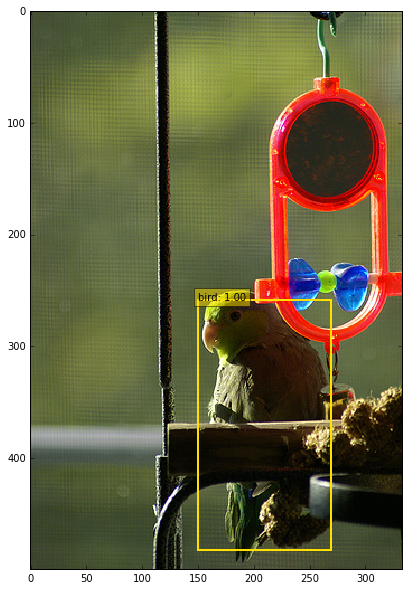

In [23]:
# Parse the outputs.
det_label = detections[0,0,:,1]
det_conf = detections[0,0,:,2]
det_xmin = detections[0,0,:,3]
det_ymin = detections[0,0,:,4]
det_xmax = detections[0,0,:,5]
det_ymax = detections[0,0,:,6]
import numpy as np
import skimage.io
from scipy.ndimage import zoom
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
def load_image(filename, color=True):
    img = skimage.img_as_float(skimage.io.imread(filename, as_grey=not color)).astype(np.float32)
    if img.ndim == 2:
        img = img[:, :, np.newaxis]
        if color:
            img = np.tile(img, (1, 1, 3))
    elif img.shape[2] == 4:
        img = img[:, :, :3]
    return img
image = load_image('./2009_000898.jpg')
# Get detections with confidence higher than 0.6.
top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.1]

top_conf = det_conf[top_indices]
top_label_indices = det_label[top_indices].tolist()
top_xmin = det_xmin[top_indices]
top_ymin = det_ymin[top_indices]
top_xmax = det_xmax[top_indices]
top_ymax = det_ymax[top_indices]
CLASSES = ('__background__', 
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

plt.imshow(image)
currentAxis = plt.gca()
colors = plt.cm.hsv(np.linspace(0, 1, len(CLASSES))).tolist()
print image.shape[0],image.shape[1]
for i in xrange(top_conf.shape[0]):
    xmin = int(round(top_xmin[i] * image.shape[1]))
    ymin = int(round(top_ymin[i] * image.shape[0]))
    xmax = int(round(top_xmax[i] * image.shape[1]))
    ymax = int(round(top_ymax[i] * image.shape[0]))
    print top_xmin[i],top_ymin[i],top_xmax[i],top_ymax[i]
    print xmin,ymin,xmax,ymax
    score = top_conf[i]
    label = int(top_label_indices[i])
    display_txt = '%s: %.2f'%(CLASSES[label], score)
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})